In [1]:
# import pandas & numpy
import pandas as pd, numpy as np

In [2]:
import chardet
with open("companies.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(6000))

# check what the character encoding might be
print(result)

{'encoding': 'utf-8', 'confidence': 0.7525, 'language': ''}


In [3]:
# Load Companies & rounds data
# Using palmos to encode file without errors
companies = pd.read_csv("companies.csv", encoding='palmos', engine="python")
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Ã”Asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [4]:
rounds2 = pd.read_csv("rounds2.csv", encoding='palmos', engine="python")
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/Ã”ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [5]:
# find unique companies in rounds2 
rounds2['company_permalink'].nunique()
a = rounds2.nunique()
a

company_permalink           90247
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

In [6]:
# find unique companies in companies 
b = companies.nunique()
b

permalink        66368
name             66099
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

In [7]:
# unique column for companies data
companies['permalink'].isnull().sum()

0

In [8]:
# Rename column permalink to company_permalink
companies = companies.rename(columns={'permalink':'company_permalink'})
companies

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Ã”Asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [9]:
# set index in companies table
companies.set_index('company_permalink')

,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
company_permalink,,,,,,,,,
/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...
/Organization/Zznode-Science-And-Technology-Co-Ltd,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011


In [10]:
# Change company_permalink data to lowercase in both tables to match the data
companies['company_permalink'] = companies['company_permalink'].str.lower()
companies

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [11]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ã”asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [12]:
#merge both tables
master_frame = pd.merge(companies, rounds2, how="outer",on='company_permalink')
master_frame

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [13]:
# check the null values in 'funding_round_type' column
master_frame['funding_round_type'].isnull().sum()
master_frame['funding_round_type'].value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [14]:
# check the null values in 'raised_amount_usd' column
master_frame['raised_amount_usd'].isnull().sum()

19990

In [15]:
master_frame['raised_amount_usd'].isnull().sum()/114949*100

17.390320924931927

In [16]:
# 'raised_amount_usd' is the target value so dropping the null values
#master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull())]
master_frame

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [17]:
# filter venture data
venture = master_frame[master_frame['funding_round_type'] == 'venture']
venture['raised_amount_usd'].describe()

count    5.022800e+04
mean     1.174895e+07
std      8.635207e+07
min      0.000000e+00
25%      1.600902e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [18]:
venture

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0
114937,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0
114941,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.0


In [19]:
# check null data
venture['raised_amount_usd'].isnull().sum()

5266

In [20]:
# percentage of null data
5266/55494*100

9.489314160089378

In [21]:
# get median for the column
venture['raised_amount_usd'].median()

5000000.0

In [22]:
# fill median inplace of null values
venture['raised_amount_usd']=venture['raised_amount_usd'].fillna(venture['raised_amount_usd'].median())

<ipython-input-22-69d25a51ced9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venture['raised_amount_usd']=venture['raised_amount_usd'].fillna(venture['raised_amount_usd'].median())


In [23]:
# check null data
venture['raised_amount_usd'].isnull().sum()

0

In [24]:
# get mean, median values
venture['raised_amount_usd'].describe()

count    5.549400e+04
mean     1.110852e+07
std      8.217658e+07
min      0.000000e+00
25%      2.000000e+06
50%      5.000000e+06
75%      1.050000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [25]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

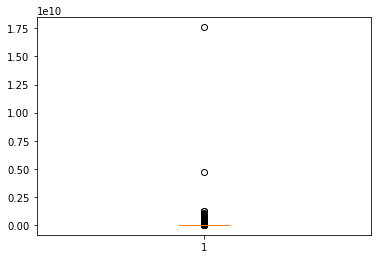

In [26]:
# box plot to see outliers
plt.boxplot(venture['raised_amount_usd'])
plt.show()

In [27]:
venture[venture['raised_amount_usd'] >= 0.390000e+10]

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
37569,/organization/freescale,Freescale Semiconductor,http://www.freescale.com,Semiconductors,ipo,USA,TX,Austin,Austin,01-01-1953,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,NaN,21-10-2006,1.760000e+10
60207,/organization/mediavast,MediaVast,NaN,Advertising|Broadcasting|Content,acquired,USA,NY,New York City,New York,01-01-1999,/funding-round/07e345b61646adffc65946de6a1c88d9,venture,B,30-06-2003,4.700000e+09


In [28]:
# filter seed data
seed = master_frame[master_frame['funding_round_type'] == 'seed']
seed['raised_amount_usd'].describe()

count    2.360300e+04
mean     7.198180e+05
std      2.221733e+06
min      0.000000e+00
25%      5.500000e+04
50%      2.750000e+05
75%      1.000000e+06
max      2.000000e+08
Name: raised_amount_usd, dtype: float64

In [29]:
seed

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0
13,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011,/funding-round/03b975068632eba5bfdb937ec8c07a68,seed,NaN,05-02-2014,150000.0
15,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011,/funding-round/e82464f22241715dd1a6c77241055ed1,seed,NaN,20-07-2011,1000050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114940,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,H9,London,London,28-01-2014,/funding-round/73721fffc980d228f051e87422aa8732,seed,NaN,24-03-2014,320000.0
114942,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.0
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0


In [30]:
# check null data
seed['raised_amount_usd'].isnull().sum()

6921

In [31]:
# fill median inplace of null values
seed['raised_amount_usd']=seed['raised_amount_usd'].fillna(seed['raised_amount_usd'].median())

In [32]:
# check null data
seed['raised_amount_usd'].isnull().sum()

0

In [33]:
# get mean, median values
seed['raised_amount_usd'].describe()

count    3.052400e+04
mean     6.189601e+05
std      1.962535e+06
min      0.000000e+00
25%      1.000000e+05
50%      2.750000e+05
75%      6.607140e+05
max      2.000000e+08
Name: raised_amount_usd, dtype: float64

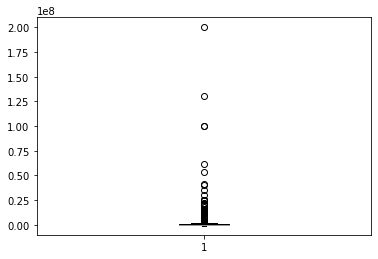

In [34]:
# box plot to see outliers
plt.boxplot(seed['raised_amount_usd'])
plt.show()

In [35]:
# filter angel data
angel = master_frame[master_frame['funding_round_type'] == 'angel']
angel['raised_amount_usd'].describe()

count    4.860000e+03
mean     9.586945e+05
std      7.404397e+06
min      0.000000e+00
25%      1.500000e+05
50%      4.000000e+05
75%      1.000000e+06
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

In [36]:
# check null data
angel['raised_amount_usd'].isnull().sum()

1234

In [37]:
# fill median inplace of null values
angel['raised_amount_usd']=angel['raised_amount_usd'].fillna(angel['raised_amount_usd'].median())

In [38]:
# check null data
angel['raised_amount_usd'].isnull().sum()

0

In [39]:
# get mean, median values
angel['raised_amount_usd'].describe()

count    6.094000e+03
mean     8.455620e+05
std      6.616035e+06
min      0.000000e+00
25%      2.000000e+05
50%      4.000000e+05
75%      7.500000e+05
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

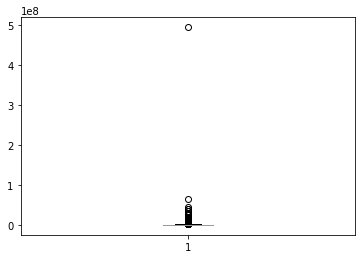

In [40]:
# box plot to see outliers
plt.boxplot(angel['raised_amount_usd'])
plt.show()

In [41]:
# filter private_equity data
private_equity = master_frame[master_frame['funding_round_type'] == 'private_equity']
private_equity['raised_amount_usd'].describe() 

count    1.936000e+03
mean     7.330859e+07
std      1.981135e+08
min      0.000000e+00
25%      5.000000e+06
50%      2.000000e+07
75%      7.500000e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

In [42]:
# check null data
private_equity['raised_amount_usd'].isnull().sum()

349

In [43]:
# fill median inplace of null values
private_equity['raised_amount_usd']=private_equity['raised_amount_usd'].fillna(private_equity['raised_amount_usd'].median())

In [44]:
# check null data
private_equity['raised_amount_usd'].isnull().sum()

0

In [45]:
# get mean, median values
private_equity['raised_amount_usd'].describe() 

count    2.285000e+03
mean     6.516649e+07
std      1.833563e+08
min      0.000000e+00
25%      6.500000e+06
50%      2.000000e+07
75%      6.240000e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

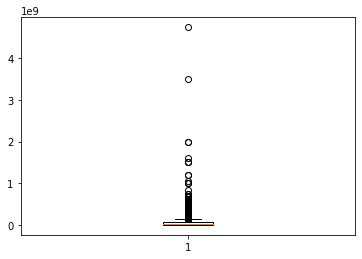

In [46]:
# box plot to see outliers
plt.boxplot(private_equity['raised_amount_usd'])
plt.show()

In [47]:
venture

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0
114937,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0
114941,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.0


In [48]:
# top 9 countries with highest funding
pivot = pd.pivot_table(data=venture, index="country_code", values="raised_amount_usd",aggfunc=sum).sort_values("raised_amount_usd",ascending=False).head(9)
pivot

,raised_amount_usd
country_code,
USA,4.336758e+11
CHN,4.245042e+10
GBR,2.148563e+10
IND,1.523186e+10
CAN,1.003333e+10
FRA,7.599537e+09
DEU,7.486960e+09
ISR,7.477515e+09
JPN,3.583677e+09


In [49]:
# changing pivot to dataframe
df = pivot.reset_index()
df

,country_code,raised_amount_usd
0,USA,4.336758e+11
1,CHN,4.245042e+10
2,GBR,2.148563e+10
3,IND,1.523186e+10
4,CAN,1.003333e+10
5,FRA,7.599537e+09
6,DEU,7.486960e+09
7,ISR,7.477515e+09
8,JPN,3.583677e+09


In [50]:
# filter top9 countries in venture
m = venture['country_code'].isin(df['country_code'])
top9 = venture[m]
top9

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,5000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114922,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0
114923,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0


In [51]:
# check null values
top9['category_list'].isnull().sum()

485

In [52]:
top9['category_list'].value_counts()

Biotechnology                                                                     5236
Software                                                                          3924
Health Care                                                                       1371
Clean Technology                                                                  1249
Enterprise Software                                                               1168
                                                                                  ... 
Biotechnology|Clean Technology|Manufacturing                                         1
Analytics|Big Data|Big Data Analytics|Business Intelligence|Data Visualization       1
E-Commerce|Fashion|Mobile|Search                                                     1
Brokers|Security|Services|Trading                                                    1
Publishing|Software|Technology                                                       1
Name: category_list, Length: 9597, dtype: i

In [53]:
485/48099*100

1.0083369716626125

In [54]:
top9[top9['category_list'].isnull()]

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
99,/organization/123feng-com,123Feng.Com,http://123feng.com/,NaN,operating,CHN,2,Hangzhou,Hangzhou,01-01-2014,/funding-round/9d83084d87dc63a309c9a6fe9bf59d1b,venture,A,27-10-2015,13000000.0
181,/organization/1mxians,1mxians,http://www.1mxian.com/,NaN,operating,CHN,22,Beijing,Beijing,01-01-2014,/funding-round/6950448f81c6706abe61f659e15a7c87,venture,A,02-12-2015,15000000.0
528,/organization/3pl-central,3PL Central,http://3plcentral.com/,NaN,operating,USA,CA,Los Angeles,Manhattan Beach,01-01-2006,/funding-round/895e7a284b35bdf86103e52db8a630a6,venture,NaN,03-12-2015,17500000.0
715,/organization/51cto,51CTO,http://www.51cto.com/,NaN,operating,CHN,22,Beijing,Beijing,NaN,/funding-round/8e4af9cbe06e0c5883b90d11a7c6251c,venture,NaN,23-11-2015,16000000.0
782,/organization/60frames-entertainment,60Frames Entertainment,http://60frames.com/,NaN,closed,USA,CA,Los Angeles,Beverly Hills,NaN,/funding-round/60daf91c26dd8f3bd8cbb7d9c28ba9b6,venture,A,02-08-2007,3500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112505,/organization/xytrans,Xytrans,NaN,NaN,closed,USA,FL,Orlando,Orlando,01-01-2000,/funding-round/72c6ca0c4590f3c4ae6500fb81746649,venture,E,29-11-2006,5000000.0
112536,/organization/yadu,Yadu,http://www.yadu.com/,NaN,operating,CHN,22,Beijing,Beijing,NaN,/funding-round/918ffbf860c5561c4f068f4491818bab,venture,A,18-08-2006,5000000.0
112785,/organization/yellowjacket,YellowJacket,http://www.yjenergy.com,NaN,closed,USA,NY,New York City,New York,NaN,/funding-round/e8a4037e2a35175aac61cd3c3153eb7e,venture,NaN,09-08-2007,1250000.0
112951,/organization/yodel,Yodel,NaN,NaN,closed,USA,CA,SF Bay Area,San Francisco,NaN,/funding-round/cd2b175af6d20770079461335d2cf44e,venture,A,02-06-2005,8000000.0


In [55]:
# Remove null data in 'category_list'
top9 = top9[~top9['category_list'].isnull()]
top9

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,5000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114922,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0
114923,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0


In [56]:
# Create column 'Primary_sector'
top9['Primary_sector'] = top9['category_list'].apply(lambda x: x.split("|")[0] if("|" in x) else x)
top9

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0,Application Platforms
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,5000000.0,Software
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114922,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,Biotechnology
114923,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0,Biotechnology
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,E-Commerce
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0,Biotechnology


In [57]:
# Read mapping data
mapping = pd.read_csv("mapping.csv", encoding='palmos', engine="python")
mapping= mapping[~mapping['category_list'].isnull()]
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [58]:
# Adding main sector in a seperate column
mapping['Main_sector'] = mapping.apply(lambda x: ','.join(c for c, i in zip(x.index, x.values) if i != 0), axis=1)

In [59]:
# Removing the extra string in 'Main_sector'
mapping['Main_sector'] = mapping['Main_sector'].apply(lambda x: x.replace("category_list,",""))
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",Main_sector
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,0,0,0,0,1,0,0,0,0,Health
...,...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0,Others
684,Wine And Spirits,0,0,0,1,0,0,0,0,0,Entertainment
685,Wireless,0,0,0,1,0,0,0,0,0,Entertainment
686,Women,0,0,0,0,0,0,0,1,0,Others


In [60]:
mapping['Main_sector'].value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Name: Main_sector, dtype: int64

In [61]:
# get only 2 columns
mapping_df = mapping.loc[:, ['category_list','Main_sector']]
mapping_df

,category_list,Main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,Health
...,...,...
683,Wholesale,Others
684,Wine And Spirits,Entertainment
685,Wireless,Entertainment
686,Women,Others


In [62]:
# merging both tables
df2 = pd.merge(top9, mapping_df, how="left",left_on='Primary_sector',right_on='category_list')
df2

,company_permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_sector,category_list_y,Main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Media,Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0,Application Platforms,Application Platforms,"News, Search and Messaging"
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web,Curated Web,"News, Search and Messaging"
3,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,5000000.0,Software,Software,Others
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology,Biotechnology,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47609,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,Biotechnology,Biotechnology,Cleantech / Semiconductors
47610,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0,Biotechnology,Biotechnology,Cleantech / Semiconductors
47611,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,E-Commerce,E-Commerce,Others
47612,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0,Biotechnology,Biotechnology,Cleantech / Semiconductors


In [63]:
#drop extra category list column
df2 = df2.drop(columns=['category_list_y'])

In [64]:
#rename category column
df2 = df2.rename(columns={"category_list_x": "category_list"})
df2

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_sector,Main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0,Application Platforms,"News, Search and Messaging"
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web,"News, Search and Messaging"
3,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,5000000.0,Software,Others
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47609,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,Biotechnology,Cleantech / Semiconductors
47610,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0,Biotechnology,Cleantech / Semiconductors
47611,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,E-Commerce,Others
47612,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0,Biotechnology,Cleantech / Semiconductors


In [65]:
df2['Main_sector'].value_counts()

Others                                     11275
Cleantech / Semiconductors                  9659
Social, Finance, Analytics, Advertising     6955
News, Search and Messaging                  5843
Health                                      3984
Manufacturing                               3346
Entertainment                               2644
Automotive & Sports                          752
Name: Main_sector, dtype: int64

In [66]:
# filtering data for country USA
D1 = df2[(df2['country_code'] == 'USA') & ((df2['raised_amount_usd']<= 15000000) & (df2['raised_amount_usd']>= 5000000))]
D1

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_sector,Main_sector
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0,Application Platforms,"News, Search and Messaging"
3,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,5000000.0,Software,Others
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics,NaN
8,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,Apps,"News, Search and Messaging"
15,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/funding-round/adf2f3272af9f552b87e01f10f0b9234,venture,NaN,01-02-2014,5000000.0,Curated Web,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47601,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,/funding-round/8411431b5a0389a874e3fae93016c089,venture,B,24-04-2010,15000000.0,Facebook Applications,"Social, Finance, Analytics, Advertising"
47604,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,A,12-02-2008,5026000.0,Facebook Applications,"Social, Finance, Analytics, Advertising"
47608,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,Biotechnology,Cleantech / Semiconductors
47609,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,Biotechnology,Cleantech / Semiconductors


In [67]:
# filtering data for country GBR
D2 = df2[(df2['country_code'] == 'GBR') & ((df2['raised_amount_usd']<= 15000000) & (df2['raised_amount_usd']>= 5000000))]
D2

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_sector,Main_sector
154,/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,Android,"Social, Finance, Analytics, Advertising"
353,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,Content Creators,Entertainment
354,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,Content Creators,Entertainment
385,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
386,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47484,/organization/zopa,Zopa,http://www.zopa.com,Finance|FinTech,operating,GBR,H9,London,London,01-03-2005,/funding-round/2a55d435c3433d8f903526c050c19361,venture,C,20-03-2007,12900000.0,Finance,NaN
47485,/organization/zopa,Zopa,http://www.zopa.com,Finance|FinTech,operating,GBR,H9,London,London,01-03-2005,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,B,01-03-2006,15000000.0,Finance,NaN
47486,/organization/zopa,Zopa,http://www.zopa.com,Finance|FinTech,operating,GBR,H9,London,London,01-03-2005,/funding-round/51b67c36a1c7ecfa2bcfeaabc2930257,venture,D,11-12-2012,5000000.0,Finance,NaN
47487,/organization/zopa,Zopa,http://www.zopa.com,Finance|FinTech,operating,GBR,H9,London,London,01-03-2005,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,B,01-07-2006,5000000.0,Finance,NaN


In [68]:
# filtering data for country IND
D3 = df2[(df2['country_code'] == 'IND') & ((df2['raised_amount_usd']<= 15000000) & (df2['raised_amount_usd']>= 5000000))]
D3

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_sector,Main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
10,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,5000000.0,Beauty,Health
82,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,E-Commerce,Others
401,/organization/99games-online-private-limited,99Games Online Private Limited,http://www.99games.in,Games,operating,IND,19,Udupi,Udupi,01-01-2008,/funding-round/87ada2328b16d0e9f5122e7dff49cf0c,venture,B,17-04-2015,5000000.0,Games,Entertainment
418,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.0,Finance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47445,/organization/zoomcar-india,ZoomCar,http://www.zoomcar.in,Automotive|Consumers|E-Commerce|Transportation,operating,IND,19,Bangalore,Bangalore,01-01-2012,/funding-round/a7cdd2e85e583a992e021b323b7374ad,venture,A,31-10-2014,8000000.0,Automotive,Automotive & Sports
47446,/organization/zoomcar-india,ZoomCar,http://www.zoomcar.in,Automotive|Consumers|E-Commerce|Transportation,operating,IND,19,Bangalore,Bangalore,01-01-2012,/funding-round/de560f3d008b7662d844e48fa1e467b3,venture,NaN,08-07-2015,11000000.0,Automotive,Automotive & Sports
47457,/organization/zoomo,Zoomo,http://www.gozoomo.com/,Internet,operating,IND,19,Bangalore,Bangalore,01-01-2014,/funding-round/473111947c0915402be71b8b61ec62f6,venture,A,02-07-2015,5000000.0,Internet,"News, Search and Messaging"
47489,/organization/zopnow,ZopNow,http://www.zopnow.com,Groceries|Logistics,operating,IND,19,Bangalore,Bangalore,13-09-2011,/funding-round/a0fa8c6ccaa3f11f3f0f196e03ff7449,venture,A,13-04-2015,10000000.0,Groceries,Manufacturing


In [69]:
# total amount of investment
s1 = D1['raised_amount_usd'].sum()
s2 = D2['raised_amount_usd'].sum()
s3 = D3['raised_amount_usd'].sum()
s1, s2, s3

(118221584223.0, 6499078691.0, 3774543602.0)

In [70]:
#sectors count in D1
D1['Main_sector'].value_counts()

Others                                     3373
Cleantech / Semiconductors                 2561
Social, Finance, Analytics, Advertising    2309
News, Search and Messaging                 1824
Health                                     1048
Manufacturing                               989
Entertainment                               712
Automotive & Sports                         228
Name: Main_sector, dtype: int64

In [71]:
#sectors count in D2
D2['Main_sector'].value_counts()

Others                                     207
Cleantech / Semiconductors                 150
Social, Finance, Analytics, Advertising    139
News, Search and Messaging                  97
Entertainment                               78
Manufacturing                               52
Health                                      32
Automotive & Sports                         26
Name: Main_sector, dtype: int64

In [72]:
#sectors count in D3
D3['Main_sector'].value_counts()

Others                                     157
News, Search and Messaging                  76
Social, Finance, Analytics, Advertising     59
Entertainment                               46
Health                                      33
Manufacturing                               30
Cleantech / Semiconductors                  29
Automotive & Sports                         14
Name: Main_sector, dtype: int64

In [73]:
# sort investment companies based on amount raised for 'others' sector in D1
f1o = D1[D1['Main_sector']== 'Others'].sort_values("raised_amount_usd",ascending=False)
pi1o = pd.pivot_table(data=f1o, index=['company_permalink','name','status'],values="raised_amount_usd",aggfunc=sum).sort_values("raised_amount_usd",ascending=False)
pi1o

,,,raised_amount_usd
company_permalink,name,status,
/organization/virtustream,Virtustream,acquired,64300000.0
/organization/emn8,Tillster,operating,61198945.0
/organization/capella,Capella Photonics,operating,54968051.0
/organization/airtight-networks,AirTight Networks,operating,54201907.0
/organization/decarta,deCarta,acquired,52100000.0
...,...,...,...
/organization/g2-switchworks,G2 SwitchWorks,operating,5000000.0
/organization/syncreon,Syncreon,operating,5000000.0
/organization/synapticmash,SynapticMash,acquired,5000000.0


In [74]:
# sort investment companies based on amount raised for 'Cleantech / Semiconductors' sector in D1
f1c = D1[D1['Main_sector']== 'Cleantech / Semiconductors'].sort_values("raised_amount_usd",ascending=False)
pi1c = pd.pivot_table(data=f1c, index=['company_permalink','name','status'], values="raised_amount_usd",aggfunc=sum).sort_values("raised_amount_usd",ascending=False)
pi1c

,,,raised_amount_usd
company_permalink,name,status,
/organization/quellan,Quellan,acquired,82000000.0
/organization/biodesix,Biodesix,operating,75300000.0
/organization/tigo-energy,Tigo Energy,operating,68739496.0
/organization/forsight-labs,ForSight Labs,operating,61300001.0
/organization/rheonix,Rheonix,operating,56124758.0
...,...,...,...
/organization/eos-climate-inc-,"EOS Climate, Inc.",operating,5000000.0
/organization/erecycling-corps,HYLA Mobile,operating,5000000.0
/organization/essenbioscience,Essen BioScience,closed,5000000.0


In [75]:
# sort investment companies based on amount raised for 'others' sector in D2
f2o = D2[D2['Main_sector']== 'Others'].sort_values("raised_amount_usd",ascending=False)
pi2o = pd.pivot_table(data=f2o, index=['company_permalink','name','status'], values="raised_amount_usd",aggfunc=sum).sort_values("raised_amount_usd",ascending=False)
pi2o

,,,raised_amount_usd
company_permalink,name,status,
/organization/electric-cloud,Electric Cloud,operating,37000000.0
/organization/notonthehighstreet,Notonthehighstreet,operating,36900000.0
/organization/sensage,SenSage,acquired,36250000.0
/organization/enigmatic,Enigmatec,closed,32500000.0
/organization/ip-access,ip.access,operating,30000000.0
...,...,...,...
/organization/fluently,fluently,closed,5000000.0
/organization/gekko,Gekko,operating,5000000.0
/organization/the-carrot-company,The Carrot Company,acquired,5000000.0


In [76]:
# sort investment companies based on amount raised for 'Cleantech / Semiconductors' sector in D2
f2c = D2[D2['Main_sector']== 'Cleantech / Semiconductors'].sort_values("raised_amount_usd",ascending=False)
pi2c = pd.pivot_table(data=f2c, index=['company_permalink','name','status'], values="raised_amount_usd",aggfunc=sum).sort_values("raised_amount_usd",ascending=False)
pi2c

,,,raised_amount_usd
company_permalink,name,status,
/organization/eusa-pharma,EUSA Pharma,acquired,35600000.0
/organization/horizon-discovery,Horizon Discovery,ipo,31353719.0
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h,F-star Biotechnology Limited,operating,29132906.0
/organization/elixent,Elixent,operating,25000000.0
/organization/takeda-cambridge,Takeda Cambridge,operating,22340000.0
...,...,...,...
/organization/lumora,Lumora,operating,5000000.0
/organization/synthace,Synthace,operating,5000000.0
/organization/nanotherics,nanoTherics,operating,5000000.0


In [77]:
# sort investment companies based on amount raised for 'others' sector in D3
f3o = D3[D3['Main_sector']== 'Others'].sort_values("raised_amount_usd",ascending=False)
pi3o = pd.pivot_table(data=f3o, index=['company_permalink','name','status'], values="raised_amount_usd",aggfunc=sum).sort_values("raised_amount_usd",ascending=False)
pi3o

,,,raised_amount_usd
company_permalink,name,status,
/organization/firstcry-com,FirstCry.com,operating,39000000.0
/organization/myntra,Myntra,acquired,38000000.0
/organization/commonfloor,CommonFloor,operating,32900000.0
/organization/pepperfry-com,Pepperfry.com,operating,28000000.0
/organization/maharana-infrastructure-and-professional-services-private-limited-mips,Maharana Infrastructure and Professional Services Private Limited (MIPS),operating,26600000.0
...,...,...,...
/organization/process-9,Process 9,operating,5000000.0
/organization/findyahan,FindYahan,operating,5000000.0
/organization/epoise,ePoise,operating,5000000.0


In [78]:
# sort investment companies based on amount raised for 'News, Search and Messaging' sector in D3
f3n = D3[D3['Main_sector']== 'News, Search and Messaging'].sort_values("raised_amount_usd",ascending=False)
pi3n = pd.pivot_table(data=f3n, index=['company_permalink','name','status'], values="raised_amount_usd",aggfunc=sum).sort_values("raised_amount_usd",ascending=False)
pi3n

,,,raised_amount_usd
company_permalink,name,status,
/organization/gupshup-technology-india-pvt-ltd,GupShup,operating,33000000.0
/organization/roadrunnr,Roadrunnr,operating,26000000.0
/organization/imimobile,IMImobile,ipo,23000000.0
/organization/sms-gupshup,SMS GupShup,operating,22000000.0
/organization/hike,hike,operating,21000000.0
...,...,...,...
/organization/mobikwik,MobiKwik,operating,5000000.0
/organization/mybustickets,MyBusTickets,operating,5000000.0
/organization/nifty-window,Nifty Window,operating,5000000.0


In [79]:
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture','angel','seed','private_equity'])]
master_frame['funding_round_type'].value_counts()

venture           55494
seed              30524
angel              6094
private_equity     2285
Name: funding_round_type, dtype: int64

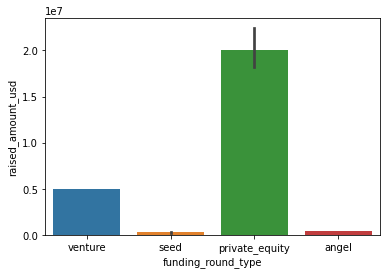

In [80]:
# barplot for funding round type
sns.barplot(data=master_frame, x='funding_round_type',y='raised_amount_usd',estimator=np.median)
plt.show()

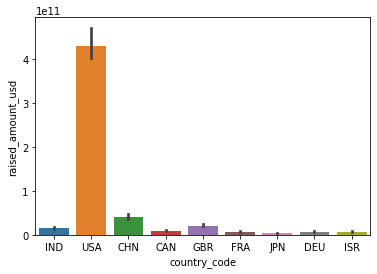

In [81]:
# barplot to find top 3 English speaking countries
sns.barplot(data=top9, x='country_code',y='raised_amount_usd',estimator=np.sum)
plt.show()

<AxesSubplot:title={'center':'IND'}>

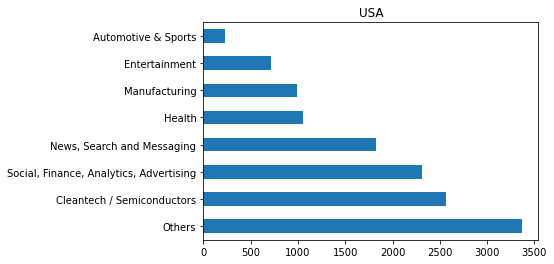

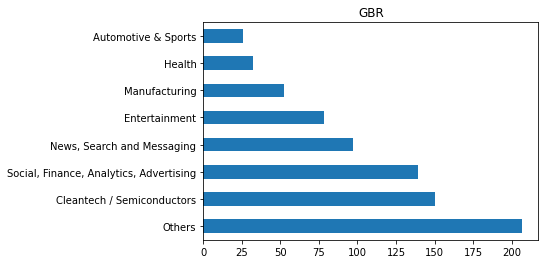

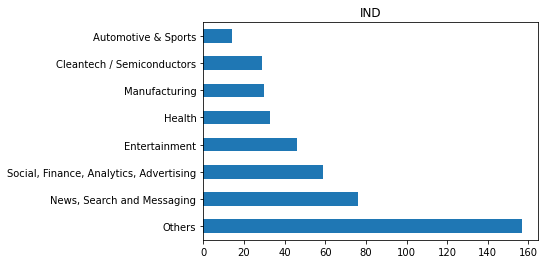

In [82]:
# bar plot to get the top 3 sectors
plt.figure(0)
D1['Main_sector'].value_counts().plot.barh(title="USA")
plt.figure(1)
D2['Main_sector'].value_counts().plot.barh(title="GBR")
plt.figure(2)
D3['Main_sector'].value_counts().plot.barh(title="IND")